#  Prédiction du nombre de délais dépassés pour un prêt bancaire

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
df.head()

,id,Type de produit,Montant accepté,Ancienneté à lemploi,Situation logement,Canal production,Durée du prêt,Type client,Statut de lemploi,Charges totales,...,Segment,Montant échéance,Situation familiale,Montant demandé,Taux dendettement,Taux dinteret,Région/pays de résidence,Genre,Ancienneté de logement,Nombre d’échéance en retard
0,id_49182,Crédit classique,310000.00,190.0,Hébergé,Agence,36,CCP,Public,10982.51,...,Salarié,10982.51,Célibataire,310000.00,0.292398,12.9,Sidi Bel-Abbès,Homme,NaN,0
1,id_69738,Crédit classique,300000.00,NaN,Propriétaire,Agence,36,CCP,NaN,10538.24,...,Retraité,10538.24,Marié (e),300000.00,0.254547,12.9,Béjaïa,Homme,0.0,0
2,id_2686,Crédit classique,360000.00,132.0,Hébergé,Agence,36,CCP,Public,12708.32,...,Salarié,12708.32,Marié (e),360000.00,0.288171,12.9,Souk - Ahras,Homme,NaN,0
3,id_43387,Crédit classique,375501.98,90.0,Hébergé,Agence,36,CCP,Public,13303.08,...,Salarié,13303.08,Célibataire,375501.98,0.295004,12.9,El - Bayadh,Homme,NaN,0
4,id_28579,Crédit classique,389130.00,24.0,Hébergé,Agence,36,CCP,Privé,13785.89,...,Salarié,13785.89,Marié (e),389130.00,0.287206,12.9,Ain - Defla,Homme,NaN,10


In [ ]:
df.describe()

,Montant accepté,Ancienneté à lemploi,Durée du prêt,Charges totales,Revenu totaux,Age,Montant demandé,Taux dendettement,Taux dinteret,Ancienneté de logement,Nombre d’échéance en retard
count,1.133300e+04,8.463000e+03,11333.000000,11333.000000,1.133300e+04,11330.000000,1.133300e+04,11333.000000,11333.000000,4362.000000,11333.000000
mean,3.887747e+05,1.256701e+08,37.536575,13563.494787,5.283473e+04,42.077758,3.886988e+05,83.200825,11.886201,28.004448,4.375629
std,2.439337e+05,7.817092e+09,5.336936,6983.117809,6.813734e+04,11.660854,2.439925e+05,5519.959927,1.103237,628.677998,7.391120
min,5.120000e+04,1.000000e+00,12.000000,2717.600000,2.500000e+04,19.000000,2.340200e+04,0.002947,0.224969,0.000000,0.000000
25%,2.624000e+05,5.900000e+01,36.000000,9595.600000,3.717596e+04,32.000000,2.620380e+05,0.256762,10.900000,0.000000,0.000000
50%,3.470040e+05,9.600000e+01,36.000000,12294.610000,4.484500e+04,41.000000,3.470000e+05,0.291369,12.900000,0.000000,0.000000
75%,4.482000e+05,1.560000e+02,36.000000,15726.250000,5.744983e+04,51.750000,4.480000e+05,0.294834,12.900000,10.000000,6.000000
max,5.000000e+06,6.604510e+11,60.000000,179971.730000,4.303092e+06,72.000000,5.000000e+06,490000.000000,12.900000,41374.400000,37.000000


In [ ]:
df['Ancienneté à lemploi'].max()

660451017150.0

In [ ]:
print("df : " + str(df.shape))

df : (11333, 25)


In [ ]:
idsUnique = len(set(df.id))
idsTotal = df.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 0 duplicate IDs for 10802 total entries


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11333 entries, 0 to 11332
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               11333 non-null  object 
 1   Type de produit                  11333 non-null  object 
 2   Montant accepté                  11333 non-null  float64
 3   Ancienneté à lemploi             8463 non-null   float64
 4   Situation logement               11333 non-null  object 
 5   Canal production                 7305 non-null   object 
 6   Durée du prêt                    11333 non-null  int64  
 7   Type client                      11333 non-null  object 
 8   Statut de lemploi                8470 non-null   object 
 9   Charges totales                  11333 non-null  float64
 10  Revenu totaux                    11333 non-null  float64
 11  Existence dun 2ème inerlocuteur  11333 non-null  object 
 12  Age               

In [ ]:
df['Type de produit'].value_counts()

Crédit classique    11093
Crédit auto           211
Crédit Auto            29
Name: Type de produit, dtype: int64

In [ ]:
df['Situation familiale'].value_counts()

Marié (e)      8201
Célibataire    2602
Divorcé (e)     368
Veuf (ve)       152
Séparé (e)        7
16792.29          1
9252.9            1
6111.2            1
Name: Situation familiale, dtype: int64

In [ ]:
y=df.iloc[:,-1]
y.head()

0     0
1     0
2     0
3     0
4    10
Name: Nombre d’échéance en retard, dtype: int64

In [ ]:
df['Type de produit']=df['Type de produit'].str.lower()
proType={"crédit classique" : 0,"crédit auto" : 1}
df['Type de produit']=df['Type de produit'].map(proType)
df['Type de produit'].value_counts()

0    11093
1      240
Name: Type de produit, dtype: int64

In [ ]:
df.isnull().sum()

id                                    0
Type de produit                       0
Montant accepté                       1
Ancienneté à lemploi               2738
Situation logement                    1
Canal production                   3835
Durée du prêt                         1
Type client                           1
Statut de lemploi                  2731
Charges totales                       1
Revenu totaux                         1
Existence dun 2ème inerlocuteur       1
Age                                   4
Secteur dactivité                  2737
Salaire net mensuel.1                 2
Segment                               1
Montant échéance                      1
Situation familiale                   1
Montant demandé                       1
Taux dendettement                     1
Taux dinteret                         1
Région/pays de résidence              1
Genre                                67
Ancienneté de logement             6621
Nombre d’échéance en retard           1


In [ ]:
df['Canal production'].fillna("Agence",inplace=True)
df.isnull().sum()

id                                    0
Type de produit                       0
Montant accepté                       0
Ancienneté à lemploi               2870
Situation logement                    0
Canal production                      0
Durée du prêt                         0
Type client                           0
Statut de lemploi                  2863
Charges totales                       0
Revenu totaux                         0
Existence dun 2ème inerlocuteur       0
Age                                   3
Secteur dactivité                  2869
Salaire net mensuel.1                 1
Segment                               0
Montant échéance                      0
Situation familiale                   0
Montant demandé                       0
Taux dendettement                     0
Taux dinteret                         0
Région/pays de résidence              0
Genre                                70
Ancienneté de logement             6971
Nombre d’échéance en retard           0


In [ ]:
df['Statut de lemploi']=df['Statut de lemploi'].str.lower()
from sklearn.preprocessing import LabelEncoder
ProType = LabelEncoder()
df["Statut de lemploi"]=ProType.fit_transform(df["Statut de lemploi"])
df['Statut de lemploi'].value_counts()
df['Statut de lemploi']=df['Statut de lemploi'].astype('category')
df['Statut de lemploi'].describe()



count     11333
unique        4
top           2
freq       7076
Name: Statut de lemploi, dtype: int64

In [ ]:
df= df[df['Secteur dactivité']!= "54"]
df= df[df['Secteur dactivité']!= "38"]
df= df[df['Secteur dactivité']!= "44"]


In [ ]:
df['Secteur dactivité']=df['Secteur dactivité'].str.lower()
from sklearn.preprocessing import LabelEncoder
ProType = LabelEncoder()
df["Secteur dactivité"]=ProType.fit_transform(df["Secteur dactivité"])
df['Secteur dactivité'].value_counts()
df['Secteur dactivité']=df['Secteur dactivité'].astype('category')
df['Secteur dactivité'].describe()


count     11330
unique       19
top           2
freq       3508
Name: Secteur dactivité, dtype: int64

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
columns_with_missing_values = ['Statut de lemploi', 'Secteur dactivité']
df[columns_with_missing_values] = imputer.fit_transform(df[columns_with_missing_values])


In [ ]:
df.drop('Ancienneté de logement', inplace=True, axis=1)

In [ ]:
df['Genre'].fillna("Homme",inplace=True)
df.isnull().sum()

id                                    0
Type de produit                       0
Montant accepté                       0
Ancienneté à lemploi               2869
Situation logement                    0
Canal production                      0
Durée du prêt                         0
Type client                           0
Statut de lemploi                     0
Charges totales                       0
Revenu totaux                         0
Existence dun 2ème inerlocuteur       0
Age                                   0
Secteur dactivité                     0
Salaire net mensuel.1                 0
Segment                               0
Montant échéance                      0
Situation familiale                   0
Montant demandé                       0
Taux dendettement                     0
Taux dinteret                         0
Région/pays de résidence              0
Genre                                 0
Nombre d’échéance en retard           0
dtype: int64

In [ ]:
df['Situation logement']=df['Situation logement'].str.lower()
from sklearn.preprocessing import LabelEncoder
ProType = LabelEncoder()
df["Situation logement"]=ProType.fit_transform(df["Situation logement"])
df['Situation logement']=df['Situation logement'].astype('category')
df['Situation logement'].describe()

count     11330
unique        3
top           0
freq       7585
Name: Situation logement, dtype: int64

In [ ]:
df['Canal production']=df['Canal production'].str.lower()
from sklearn.preprocessing import LabelEncoder
ProType = LabelEncoder()
df["Canal production"]=ProType.fit_transform(df["Canal production"])
df['Canal production']=df['Canal production'].astype('category')
df['Canal production'].describe()

count     11330
unique        3
top           0
freq      11311
Name: Canal production, dtype: int64

In [ ]:
df['Type client']=df['Type client'].str.lower()
from sklearn.preprocessing import LabelEncoder
ProType = LabelEncoder()
df["Type client"]=ProType.fit_transform(df["Type client"])
df['Type client']=df['Type client'].astype('category')
df['Type client'].describe()

count     11330
unique        2
top           0
freq       5964
Name: Type client, dtype: int64

In [ ]:
df['Segment']=df['Segment'].str.lower()
from sklearn.preprocessing import LabelEncoder
ProType = LabelEncoder()
df["Segment"]=ProType.fit_transform(df["Segment"])
df['Segment']=df['Segment'].astype('category')
df['Segment'].describe()

count     11330
unique        4
top           3
freq       8429
Name: Segment, dtype: int64

In [ ]:
df['Situation familiale']=df['Situation familiale'].str.lower()
from sklearn.preprocessing import LabelEncoder
ProType = LabelEncoder()
df["Situation familiale"]=ProType.fit_transform(df["Situation familiale"])
df['Situation familiale']=df['Situation familiale'].astype('category')
df['Situation familiale'].describe()

count     11330
unique        5
top           2
freq       8201
Name: Situation familiale, dtype: int64

In [ ]:
df['Région/pays de résidence']=df['Région/pays de résidence'].str.lower()
from sklearn.preprocessing import LabelEncoder
ProType = LabelEncoder()
df["Région/pays de résidence"]=ProType.fit_transform(df["Région/pays de résidence"])
df['Région/pays de résidence']=df['Région/pays de résidence'].astype('category')
df['Région/pays de résidence'].describe()

count     11330
unique       48
top          31
freq       2106
Name: Région/pays de résidence, dtype: int64

In [ ]:
df['Genre']=df['Genre'].str.lower()
from sklearn.preprocessing import LabelEncoder
ProType = LabelEncoder()
df["Genre"]=ProType.fit_transform(df["Genre"])
df['Genre']=df['Genre'].astype('category')
df['Genre'].describe()

count     11330
unique        2
top           1
freq       9317
Name: Genre, dtype: int64

In [ ]:
coef = df.corr()
coef.style.background_gradient(cmap='coolwarm')

,Type de produit,Montant accepté,Ancienneté à lemploi,Durée du prêt,Statut de lemploi,Charges totales,Revenu totaux,Age,Secteur dactivité,Montant demandé,Taux dendettement,Taux dinteret,Nombre d’échéance en retard
Type de produit,1.000000,0.617484,-0.002044,0.599837,-0.137832,0.427817,0.212311,-0.007552,-0.021436,0.617484,-0.031917,-0.327576,-0.030769
Montant accepté,0.617484,1.000000,-0.000424,0.529359,-0.064921,0.863224,0.356339,0.089982,0.006285,1.000000,0.195137,-0.207355,-0.062431
Ancienneté à lemploi,-0.002044,-0.000424,1.000000,0.015398,-0.002903,0.009380,0.001718,0.004169,-0.014250,-0.000424,0.009109,0.012906,-0.005380
Durée du prêt,0.599837,0.529359,0.015398,1.000000,-0.024317,0.303282,0.134212,0.078932,0.043537,0.529359,0.023574,-0.237039,-0.137682
Statut de lemploi,-0.137832,-0.064921,-0.002903,-0.024317,1.000000,-0.033748,-0.039782,0.526953,0.608453,-0.064921,0.041683,0.214596,-0.211477
Charges totales,0.427817,0.863224,0.009380,0.303282,-0.033748,1.000000,0.387335,0.116870,-0.007588,0.863224,0.269698,-0.116687,-0.061314
Revenu totaux,0.212311,0.356339,0.001718,0.134212,-0.039782,0.387335,1.000000,0.066672,-0.004579,0.356339,-0.150328,-0.077999,-0.037799
Age,-0.007552,0.089982,0.004169,0.078932,0.526953,0.116870,0.066672,1.000000,0.486257,0.089983,-0.120386,-0.133634,-0.188199
Secteur dactivité,-0.021436,0.006285,-0.014250,0.043537,0.608453,-0.007588,-0.004579,0.486257,1.000000,0.006285,-0.079533,-0.025687,-0.102864
Montant demandé,0.617484,1.000000,-0.000424,0.529359,-0.064921,0.863224,0.356339,0.089983,0.006285,1.000000,0.195136,-0.207355,-0.062430


In [ ]:
df.drop('Montant demandé', inplace=True, axis=1)
df.drop('Charges totales', inplace=True, axis=1)

In [ ]:
df.drop(df[df['Ancienneté à lemploi'] >700 ].index,inplace=True)

In [ ]:
df['Ancienneté à lemploi'].fillna(df['Ancienneté à lemploi'].median(),inplace=True)
df.isnull().sum()

id                                 0
Type de produit                    0
Montant accepté                    0
Ancienneté à lemploi               0
Situation logement                 0
Canal production                   0
Durée du prêt                      0
Type client                        0
Statut de lemploi                  0
Revenu totaux                      0
Existence dun 2ème inerlocuteur    0
Age                                0
Secteur dactivité                  0
Salaire net mensuel.1              0
Segment                            0
Montant échéance                   0
Situation familiale                0
Taux dendettement                  0
Taux dinteret                      0
Région/pays de résidence           0
Genre                              0
Nombre d’échéance en retard        0
dtype: int64

In [ ]:
df['id'] = df['id'].str.strip('id_')


In [ ]:
df['Existence dun 2ème inerlocuteur']=df['Existence dun 2ème inerlocuteur'].str.lower()
from sklearn.preprocessing import LabelEncoder
ProType = LabelEncoder()
df["Existence dun 2ème inerlocuteur"]=ProType.fit_transform(df["Existence dun 2ème inerlocuteur"])
df['Existence dun 2ème inerlocuteur']=df['Existence dun 2ème inerlocuteur'].astype('category')
df['Existence dun 2ème inerlocuteur'].describe()

count     11281
unique        2
top           0
freq      11004
Name: Existence dun 2ème inerlocuteur, dtype: int64

In [ ]:
df['Salaire net mensuel.1'].value_counts()
import re
df['Salaire net mensuel.1'] = df['Salaire net mensuel.1'].apply(lambda x: re.sub('[^0-9.,]', '', str(x)))


In [ ]:
df["Salaire net mensuel.1"]=df["Salaire net mensuel.1"].map(lambda b: b.strip(''))


In [ ]:
df.dropna(subset=['Salaire net mensuel.1'], inplace=True)
df["Salaire net mensuel.1"]=df["Salaire net mensuel.1"].astype(float)

In [ ]:
df["Salaire net mensuel.1"] = pd.to_numeric(df["Salaire net mensuel.1"], errors='coerce')


In [ ]:
import re
df['Montant échéance'] = df['Montant échéance'].apply(lambda x: re.sub('[^0-9.,]', '', str(x)))
df.dropna(subset=['Montant échéance'], inplace=True)
df["Montant échéance"] = df["Montant échéance"].str.strip()
df["Montant échéance"] = pd.to_numeric(df["Montant échéance"], errors='coerce')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11281 entries, 0 to 11332
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   id                               11281 non-null  object  
 1   Type de produit                  11281 non-null  int64   
 2   Montant accepté                  11281 non-null  float64 
 3   Ancienneté à lemploi             11281 non-null  float64 
 4   Situation logement               11281 non-null  category
 5   Canal production                 11281 non-null  category
 6   Durée du prêt                    11281 non-null  int64   
 7   Type client                      11281 non-null  category
 8   Statut de lemploi                11281 non-null  float64 
 9   Revenu totaux                    11281 non-null  float64 
 10  Existence dun 2ème inerlocuteur  11281 non-null  category
 11  Age                              11281 non-null  float64 
 12  Sect

In [ ]:
df.dropna(inplace=True)

Scaling


In [ ]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
X = df.drop('id', axis=1)
X = df.drop('Nombre d’échéance en retard', axis=1)
x_scaled = SC.fit_transform(X)

Algo1

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#X1 = df.drop('id', axis=1)
#X1 = df.drop('Nombre d’échéance en retard', axis=1)
Y = df['Nombre d’échéance en retard']
X_train, X_test, y_train, y_test = train_test_split(x_scaled, Y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)



In [ ]:
print(Y)

0         0.0
1         0.0
2         0.0
3         0.0
4        10.0
         ... 
10795     0.0
10796     6.0
10798    34.0
10799     4.0
10800     0.0
Name: Nombre d’échéance en retard, Length: 10753, dtype: float64


In [ ]:
print(rmse)

9.576395220579325


In [ ]:
xtest=pd.read_csv('test1.csv')

In [ ]:
xtest

,Unnamed: 0,Type de produit,Montant accepté,Ancienneté à lemploi,Situation logement,Canal production,Durée du prêt,Type client,Statut de lemploi,Revenu totaux,...,Age,Secteur dactivité,Salaire net mensuel.1,Segment,Montant échéance,Situation familiale,Taux dendettement,Taux dinteret,Région/pays de résidence,Genre
0,0,-0.151953,-0.376622,0.001483,0.367325,-0.043462,1.943052,-0.957984,-0.209489,-0.270381,...,-0.068056,-0.272164,-0.248973,0.588088,-0.700083,0.548222,-0.631771,0.941043,0.354886,0.451963
1,1,-0.151953,1.167436,-0.046480,-0.708068,-0.043462,-0.294046,-0.957984,1.428573,1.003885,...,1.377290,1.393778,1.039312,-1.651540,1.794734,0.548222,-1.134766,0.941043,0.565898,0.451963
2,2,-0.151953,0.348217,-0.046480,-0.708068,-0.043462,-0.294046,1.044046,1.428573,0.036877,...,1.887412,1.393778,0.061666,-1.651540,0.539923,0.548222,0.652664,-0.898892,-0.278149,0.451963
3,3,-0.151953,0.034271,-0.064466,-0.708068,-0.043462,-0.294046,-0.957984,-0.209489,0.011624,...,1.037209,-1.029410,0.036135,0.588088,0.196045,0.548222,-0.019312,0.941043,0.284549,0.451963
4,4,-0.151953,0.393519,-0.082452,-0.708068,-0.043462,1.943052,1.044046,-0.209489,-0.101234,...,1.207249,0.939430,-0.077964,0.588088,0.103905,0.548222,0.559495,-0.898892,-1.473883,0.451963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5578,5578,-0.151953,-0.123683,-0.118425,-0.708068,-0.043462,-0.294046,1.044046,-0.209489,-0.174055,...,-1.343361,-1.029410,-0.151587,0.588088,-0.094842,-1.689149,0.594088,-0.898892,0.565898,0.451963
5579,5579,-0.151953,0.525652,0.013473,-0.708068,-0.043462,-0.294046,-0.957984,-0.209489,0.173682,...,-0.663198,-1.029410,0.199976,0.588088,0.903259,0.548222,0.576648,0.941043,0.776910,0.451963
5580,5580,-0.151953,0.374643,-0.046480,-0.708068,-0.043462,1.943052,-0.957984,1.428573,-0.081236,...,0.016964,1.393778,-0.057746,-1.651540,0.156756,-1.689149,0.546348,0.941043,1.620958,0.451963
5581,5581,-0.151953,0.117930,0.013473,-0.708068,-0.043462,-0.294046,-0.957984,-0.209489,-0.032829,...,0.187005,-1.029410,-0.008807,0.588088,0.316450,0.548222,0.600753,0.941043,-1.262871,-2.212568


In [ ]:
y_pred = model.predict(xtest)


NameError: ignored

In [ ]:
y_pred

array([ 0., 15.,  0., ...,  0.,  0.,  0.])

In [ ]:
ypred= pd.DataFrame(y_pred)

In [ ]:
ypred

,0
0,0.0
1,15.0
2,0.0
3,0.0
4,0.0
...,...
5578,0.0
5579,0.0
5580,0.0
5581,0.0


In [ ]:
sample=pd.read_csv('SampleSubmission.csv')
sample=sample["id"]
sample

0       id_89668
1       id_68297
2       id_77021
3       id_27759
4       id_89347
          ...   
5578    id_13927
5579    id_66626
5580    id_95016
5581     id_8354
5582     id_6181
Name: id, Length: 5583, dtype: object

In [ ]:
sy=pd.concat([sample,ypred],axis= 1)
sy

,id,0
0,id_89668,0.0
1,id_68297,15.0
2,id_77021,0.0
3,id_27759,0.0
4,id_89347,0.0
...,...,...
5578,id_13927,0.0
5579,id_66626,0.0
5580,id_95016,0.0
5581,id_8354,0.0


In [ ]:
sy['Nombre d’échéance en retard']=sy[0]
sy.head()

,id,0,Nombre d’échéance en retard
0,id_89668,0.0,0.0
1,id_68297,15.0,15.0
2,id_77021,0.0,0.0
3,id_27759,0.0,0.0
4,id_89347,0.0,0.0


In [ ]:
sy=sy.drop(0,axis=1)

In [ ]:
sy.head()

,id,Nombre d’échéance en retard
0,id_89668,0.0
1,id_68297,15.0
2,id_77021,0.0
3,id_27759,0.0
4,id_89347,0.0


In [ ]:
sy1=sy.set_index("id",drop=True)

In [ ]:
sy

,id,0
0,id_89668,0.0
1,id_68297,15.0
2,id_77021,0.0
3,id_27759,0.0
4,id_89347,0.0
...,...,...
5578,id_13927,0.0
5579,id_66626,0.0
5580,id_95016,0.0
5581,id_8354,0.0


In [ ]:
sy.to_csv('submission2.csv')


In [ ]:
sy1.to_csv('sub1.csv')

# **Random forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Y = df['Nombre d’échéance en retard']
X_train, X_test, y_train, y_test = train_test_split(x_scaled, Y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
print(rmse)


6.832930528470284


In [ ]:
y_pred2 = rf_model.predict(xtest)
ypred2= pd.DataFrame(y_pred2)
sa=pd.concat([sample,ypred2],axis= 1)
sa['Nombre d’échéance en retard']=sa[0]
sa=sa.drop(0,axis=1)
sy2=sa.set_index("id",drop=True)
sy2.to_csv('sub3.csv')



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


## **Random FOrest with Gridsearch**

In [ ]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    # Add more hyperparameters if needed
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_scaled, Y)



## **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Y = df['Nombre d’échéance en retard']
X_train, X_test, y_train, y_test = train_test_split(x_scaled, Y, test_size=0.2, random_state=42)
rmse_val = [] #to store rmse values for different k
for K in range(100):
    K = K+1
    kn = KNeighborsRegressor(n_neighbors = K)
    kn.fit(X_train, y_train)
    ypred=kn.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,ypred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

In [ ]:
knn = KNeighborsRegressor(n_neighbors=70)  # Set the number of neighbors=70
knn.fit(X_train, y_train)


7.350106341163121


In [ ]:
y_pred3 = knn.predict(xtest)
ypred3= pd.DataFrame(y_pred3)
sb=pd.concat([sample,ypred3],axis= 1)
sb['Nombre d’échéance en retard']=sb[0]
sb=sb.drop(0,axis=1)
sy3=sb.set_index("id",drop=True)
sy3.to_csv('sub4.csv')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


## ***trying without scaling***

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#X1 = df.drop('id', axis=1)
#X1 = df.drop('Nombre d’échéance en retard', axis=1)
Y = df['Nombre d’échéance en retard']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

9.426993202332337


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Y = df['Nombre d’échéance en retard']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

6.833259500192641


In [ ]:
knn = KNeighborsRegressor(n_neighbors=70)  # Set the number of neighbors=70
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

6.942773588118351


## **Linear Reg**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Y = df['Nombre d’échéance en retard']
X_train, X_test, y_train, y_test = train_test_split(x_scaled, Y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

6.874420805000461


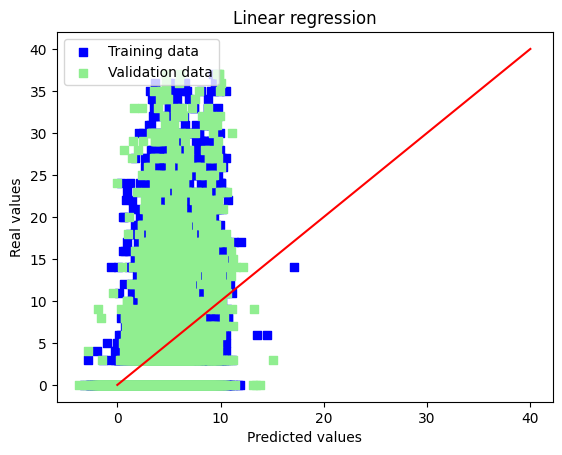

In [ ]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([0,40], [0,40], c = "red")
plt.show()

Best alpha : 30.0
Best alpha : 30.0
Try again for more precision with alphas centered around 30.0
Best alpha : 33.0
Ridge RMSE on Training set : 7.054809258709403
Ridge RMSE on Test set : 6.857827564575954
Try again for more precision with alphas centered around 33.0
Best alpha : 33.0


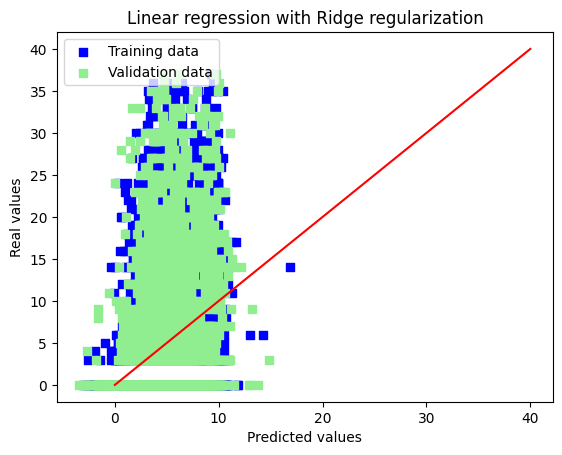

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split

scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)
# 2* Ridge
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85,
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4],
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85,
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4],
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([0,40], [0,40], c = "red")
plt.show()


Best alpha : 0.006
Lasso RMSE on Training set : 7.057264537406918
Lasso RMSE on Test set : 6.860555750612757
Try again for more precision with alphas centered around 0.006
Best alpha : 0.0057


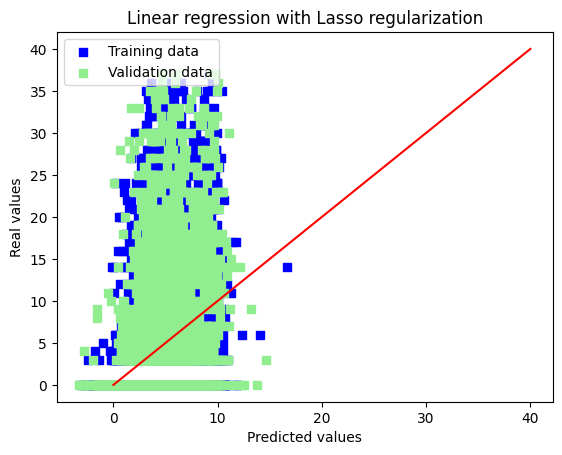

In [ ]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1,
                          0.3, 0.6, 1],
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)
print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8,
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05,
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35,
                          alpha * 1.4],
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)
plt.scatter(y_train_las, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([0,40], [0,40], c = "red")
plt.show()

### **xgbOOOST**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Y = df['Nombre d’échéance en retard']
X_train, X_test, y_train, y_test = train_test_split(x_scaled, Y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {
    'objective': 'reg:squarederror',  # Regression task
    'eval_metric': 'rmse',  # Evaluation metric: Root Mean Squared Error
    'eta': 0.1,  # Learning rate
    'max_depth': 3,  # Maximum depth of a tree
    'subsample': 0.8,  # Subsample ratio of the training instances
    'colsample_bytree': 0.8  # Subsample ratio of columns when constructing each tree
}
num_rounds = 150  # Number of boosting rounds
model = xgb.train(params, dtrain, num_rounds)
y_pred = model.predict(dtest)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

6.567198318349154


In [ ]:
dtest = xgb.DMatrix(xtest)
y_pred5 = model.predict(dtest)
ypred5= pd.DataFrame(y_pred5)
sx=pd.concat([sample,ypred5],axis= 1)
sx['Nombre d’échéance en retard']=sx[0]
sx=sx.drop(0,axis=1)
syx=sx.set_index("id",drop=True)
syx.to_csv('sub5.csv')

## **Catboost**

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 4.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Y = df['Nombre d’échéance en retard']
X_train, X_test, y_train, y_test = train_test_split(x_scaled, Y, test_size=0.2, random_state=42)
catboost_model = CatBoostRegressor(iterations=2000,  # Number of boosting iterations
                                   learning_rate=0.090,  # Learning rate
                                   depth=8,  # Depth of the trees
                                   loss_function='RMSE',  # Loss function
                                   random_seed=42)  # Random seed for reproducibility

catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)
y_pred = catboost_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

6.5310453118386596


In [ ]:
y_pred6 = catboost_model.predict(xtest)
ypred6= pd.DataFrame(y_pred6)
sc=pd.concat([sample,ypred6],axis= 1)
sc['Nombre d’échéance en retard']=sc[0]
sc=sc.drop(0,axis=1)
syc=sc.set_index("id",drop=True)
syc.to_csv('sub7.csv')

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Y = df['Nombre d’échéance en retard']
X_train, X_test, y_train, y_test = train_test_split(x_scaled, Y, test_size=0.2, random_state=42)
best_params = {}
best_score = float('inf')

# Define the hyperparameters to try
iterations = [1000, 2000, 3000]
learning_rates = [ 0.005, 0.01, 0.001]
depths = [ 6, 8,10]

# Iterate over hyperparameter combinations
for iteration in iterations:
    for learning_rate in learning_rates:
        for depth in depths:
            # Create the CatBoostRegressor model with the current hyperparameters
            catboost_model = CatBoostRegressor(iterations=iteration, learning_rate=learning_rate, depth=depth)

            # Fit the model on the training data
            catboost_model.fit(X_train, y_train, verbose=False)

            # Predict on the test set
            y_pred = catboost_model.predict(X_test)

            # Calculate the mean squared error (MSE)
            mse = mean_squared_error(y_test, y_pred)

            # Check if the current combination of hyperparameters is better than the previous best
            if mse < best_score:
                best_score = mse
                best_params = {'iterations': iteration, 'learning_rate': learning_rate, 'depth': depth}

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score (MSE):", best_score)

Best Parameters: {'iterations': 3000, 'learning_rate': 0.005, 'depth': 6}
Best Score (MSE): 42.48557470031206


In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Y = df['Nombre d’échéance en retard']
X_train, X_test, y_train, y_test = train_test_split(x_scaled, Y, test_size=0.2, random_state=42)
catboost_model = CatBoostRegressor(iterations=3000,  # Number of boosting iterations
                                   learning_rate=0.005,  # Learning rate
                                   depth=6,  # Depth of the trees
                                   loss_function='RMSE',  # Loss function
                                   random_seed=42)  # Random seed for reproducibility

catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)
y_pred = catboost_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

6.56849478260503


In [ ]:
y_pred6 = catboost_model.predict(xtest)
ypred6= pd.DataFrame(y_pred6)
sc=pd.concat([sample,ypred6],axis= 1)
sc['Nombre d’échéance en retard']=sc[0]
sc=sc.drop(0,axis=1)
syc=sc.set_index("id",drop=True)
syc.to_csv('sub8.csv')

In [ ]:
from sklearn.model_selection import train_test_split
Y = df['Nombre d’échéance en retard']

X_train, X_test, y_train, y_test = train_test_split(x_scaled, Y, test_size=0.2, random_state=42)

from sklearn.ensemble import VotingRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor

cat_model = CatBoostRegressor(learning_rate=0.001, n_estimators=500, max_depth=10,  loss_function='RMSE')
rfr_model = RandomForestRegressor(n_estimators=200)
voting_regressor = VotingRegressor(estimators=[('catboost', cat_model), ('random_forest', rfr_model)])

voting_regressor.fit(X_train, y_train)

y_pred = voting_regressor.predict(X_test)


0:	learn: 7.4363616	total: 32.4ms	remaining: 16.2s
1:	learn: 7.4352880	total: 62.5ms	remaining: 15.6s
2:	learn: 7.4342286	total: 94.1ms	remaining: 15.6s
3:	learn: 7.4331372	total: 125ms	remaining: 15.5s
4:	learn: 7.4321520	total: 158ms	remaining: 15.6s
5:	learn: 7.4310424	total: 185ms	remaining: 15.2s
6:	learn: 7.4299438	total: 212ms	remaining: 14.9s
7:	learn: 7.4288986	total: 253ms	remaining: 15.5s
8:	learn: 7.4278729	total: 282ms	remaining: 15.4s
9:	learn: 7.4268380	total: 308ms	remaining: 15.1s
10:	learn: 7.4258157	total: 338ms	remaining: 15s
11:	learn: 7.4247545	total: 364ms	remaining: 14.8s
12:	learn: 7.4236270	total: 397ms	remaining: 14.9s
13:	learn: 7.4225769	total: 424ms	remaining: 14.7s
14:	learn: 7.4215261	total: 455ms	remaining: 14.7s
15:	learn: 7.4205074	total: 481ms	remaining: 14.6s
16:	learn: 7.4194704	total: 511ms	remaining: 14.5s
17:	learn: 7.4184428	total: 547ms	remaining: 14.6s
18:	learn: 7.4173567	total: 574ms	remaining: 14.5s
19:	learn: 7.4162801	total: 604ms	remain

In [ ]:
y_pred = voting_regressor.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)



6.711707445470295


In [ ]:
y_pred7= voting_regressor.predict(xtest)
ypred7= pd.DataFrame(y_pred7)
sd=pd.concat([sample,ypred7],axis= 1)
sd['Nombre d’échéance en retard']=sd[0]
sd=sd.drop(0,axis=1)
syd=sd.set_index("id",drop=True)
syd.to_csv('vote.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
#trying new param
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Y = df['Nombre d’échéance en retard']
X_train, X_test, y_train, y_test = train_test_split(x_scaled, Y, test_size=0.2, random_state=42)
catboost_model = CatBoostRegressor(iterations=1000,  # Number of boosting iterations
                                   learning_rate=0.005,  # Learning rate
                                   depth=10,  # Depth of the trees
                                   loss_function='RMSE',  # Loss function
                                   random_seed=42)  # Random seed for reproducibility

catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)
y_pred = catboost_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

6.608449271641793


In [ ]:
y_pred6 = catboost_model.predict(xtest)
ypred6= pd.DataFrame(y_pred6)
sc=pd.concat([sample,ypred6],axis= 1)
sc['Nombre d’échéance en retard']=sc[0]
sc=sc.drop(0,axis=1)
syc=sc.set_index("id",drop=True)
syc.to_csv('sub10.csv')

# **LGBM**

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Y = df['Nombre d’échéance en retard']
X_train, X_test, y_train, y_test = train_test_split(x_scaled, Y, test_size=0.2, random_state=42)
train_data = lgb.Dataset(X_train, label=y_train)
# Set the parameters for LightGBM
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 50,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'seed': 42
}
model = lgb.train(params, train_data, num_boost_round=1000)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.205021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1946
[LightGBM] [Info] Number of data points in the train set: 9024, number of used features: 20
[LightGBM] [Info] Start training from score 4.412677
7.2938413759044325


In [ ]:
X_train

array([[ 0.07573532, -0.14743528, -0.08974523, ..., -0.90973568,
         0.44729657,  0.46534143],
       [ 1.11766065, -0.14743528, -0.03654306, ..., -0.90973568,
         1.07863692,  0.46534143],
       [ 0.3851417 , -0.14743528,  0.61825284, ..., -0.90973568,
        -0.74523519,  0.46534143],
       ...,
       [-0.50051145, -0.14743528, -0.86731536, ...,  0.92962774,
         1.00848799,  0.46534143],
       [-0.2524252 , -0.14743528, -0.4457905 , ...,  0.92962774,
         0.79804121,  0.46534143],
       [ 1.89370546, -0.14743528, -0.03654306, ..., -0.90973568,
        -1.0258309 ,  0.46534143]])

In [ ]:
#Hyperparam
from sklearn.model_selection import train_test_split, KFold
X_train, X_test, y_train, y_test = train_test_split(x_scaled, Y, test_size=0.2, random_state=42)

num_leaves_values = [20, 50, 100]
learning_rate_values = [0.01, 0.005, 0.001]
feature_fraction_values = [0.8, 0.9, 1.0]
bagging_fraction_values = [0.8, 0.9, 1.0]
bagging_freq_values = [3, 5, 7]

best_params = None
best_rmse = float('inf')

# Iterate over parameter combinations
for num_leaves in num_leaves_values:
    for learning_rate in learning_rate_values:
        for feature_fraction in feature_fraction_values:
            for bagging_fraction in bagging_fraction_values:
                for bagging_freq in bagging_freq_values:
                    # Set the current parameters
                    params = {
                        'num_leaves': num_leaves,
                        'learning_rate': learning_rate,
                        'feature_fraction': feature_fraction,
                        'bagging_fraction': bagging_fraction,
                        'bagging_freq': bagging_freq
                    }

                    # Create and train the LightGBM model
                    model = lgb.LGBMRegressor(**params)
                    model.fit(X_train, y_train)

                    # Make predictions on the validation set
                    val_predictions = model.predict(X_test)

                    # Calculate RMSE
                    rmse = np.sqrt(mean_squared_error(y_test, val_predictions))

                    # Check if the current combination is the best
                    if rmse < best_rmse:
                        best_rmse = rmse
                        best_params = params

# Train the final model with the best parameters
final_model = lgb.LGBMRegressor(**best_params)
final_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Best Parameters:", best_params)
print("Root Mean Squared Error (RMSE):", rmse)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will b

In [ ]:
#Best Parameters: {'num_leaves': 100, 'learning_rate': 0.01, 'feature_fraction': 0.9, 'bagging_fraction': 0.8, 'bagging_freq': 5}
#Root Mean Squared Error (RMSE): 6.693721475513716



In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Y = df['Nombre d’échéance en retard']
X_train, X_test, y_train, y_test = train_test_split(x_scaled, Y, test_size=0.2, random_state=42)
train_data = lgb.Dataset(X_train, label=y_train)
# Set the parameters for LightGBM
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 100,
    'learning_rate': 0.01,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'seed': 42
}
model = lgb.train(params, train_data, num_boost_round=1000)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1946
[LightGBM] [Info] Number of data points in the train set: 9024, number of used features: 20
[LightGBM] [Info] Start training from score 4.412677
6.831039471142962


In [ ]:
y_pred10 = model.predict(xtest)
ypred10= pd.DataFrame(y_pred10)
sc=pd.concat([sample,ypred10],axis= 1)
sc['Nombre d’échéance en retard']=sc[0]
sc=sc.drop(0,axis=1)
syc=sc.set_index("id",drop=True)
syc.to_csv('lgbm.csv')

# **NN**

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_scaled, Y, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Epoch 1/100
282/282 [==============================] - 1s 2ms/step - loss: 52.9486
Epoch 2/100
282/282 [==============================] - 1s 2ms/step - loss: 48.2699
Epoch 3/100
282/282 [==============================] - 1s 2ms/step - loss: 47.5685
Epoch 4/100
282/282 [==============================] - 0s 2ms/step - loss: 47.0286
Epoch 5/100
282/282 [==============================] - 0s 2ms/step - loss: 46.6074
Epoch 6/100
282/282 [==============================] - 1s 2ms/step - loss: 46.1756
Epoch 7/100
282/282 [==============================] - 1s 2ms/step - loss: 45.9227
Epoch 8/100
282/282 [==============================] - 1s 2ms/step - loss: 45.6933
Epoch 9/100
282/282 [==============================] - 1s 2ms/step - loss: 45.4688
Epoch 10/100
282/282 [==============================] - 1s 3ms/step - loss: 45.2194
Epoch 11/100
282/282 [==============================] - 1s 2ms/step - loss: 45.0482
Epoch 12/100
282/282 [==============================] - 1s 3ms/step - loss: 44.8792
E

In [ ]:
y_pred10 = model.predict(xtest)
ypred10= pd.DataFrame(y_pred10)
sc=pd.concat([sample,ypred10],axis= 1)
sc['Nombre d’échéance en retard']=sc[0]
sc=sc.drop(0,axis=1)
syc=sc.set_index("id",drop=True)
syc.to_csv('NN.csv')

175/175 [==============================] - 1s 4ms/step


In [ ]:
df["Nombre d’échéance en retard"].value_counts()

0     6743
3      823
4      477
5      356
6      260
7      207
9      193
8      183
11     179
12     168
10     161
14     143
13     138
15     124
17     116
18      97
19      97
16      91
20      82
21      73
23      64
22      61
25      61
24      55
27      49
26      48
28      37
30      37
29      34
32      25
35      23
34      20
33      20
31      19
36      10
37       7
Name: Nombre d’échéance en retard, dtype: int64

# **SVM**

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


Y = df['Nombre d’échéance en retard']
X_train, X_test, y_train, y_test = train_test_split(x_scaled, Y, test_size=0.2, random_state=42)
svm = SVR(kernel='rbf')  # You can try different kernels like 'rbf' or 'poly'
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 7.373413338051754


In [ ]:
y_pred10 = svm.predict(xtest)
ypred10= pd.DataFrame(y_pred10)
sc=pd.concat([sample,ypred10],axis= 1)
sc['Nombre d’échéance en retard']=sc[0]
sc=sc.drop(0,axis=1)
syc=sc.set_index("id",drop=True)
syc.to_csv('svm.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
